# Understanding Causality: The Quest for Why

In statistics and behavioral science, we're really into figuring out why things happen the way they do. This is super important because it helps us get to the bottom of things, beyond just watching events unfold. Causality, which is all about digging into the cause and effect of stuff, is a big deal for us. It's like having a superpower that lets us see beyond the surface and understand the real reasons things happen, whether we're talking about health, building stuff, keeping communities safe, or managing money. Knowing how different things influence each other is crucial because it guides how we make choices, create rules, and push forward with new discoveries

### The Scope of Causal Inference

Causal inference is like a huge and deep pool filled with different ways to explore how one thing leads to another. It's all about getting to the heart of big questions, questions that really matter both in the classroom and in real life: <br>

How can we be sure that a medical treatment is actually helping? <br>
What makes something break down when it's supposed to work? <br>
How do we know for sure that a vaccine works? <br>
Why did a website suddenly get a lot more visitors? <br> 

These kinds of questions push scientists and researchers to get creative and come up with new ways to connect the dots between what we see and what it means. It's about moving from just noticing stuff to really understanding it, from watching things happen to figuring out why they do. <br>

#### The Ladder of Causality: A Framework by Judea Pearl

In the tricky world of figuring out causes and effects, we look up to something called the "ladder of causality," a cool idea from Judea Pearl. This concept breaks down the whole journey of understanding why things happen into three main steps, each one getting us closer to really getting the full picture:


 **Association (Seeing):** This is where we start. It's all about noticing if two things seem to happen together. Like, if one thing changes, does the other? We use stuff like checking out if two things move in sync (correlation) to do this. But just because they move together doesn't mean one caused the other—it's just a hint that there might be something more to explore.


 **Intervention (Doing):** Next up, we get our hands dirty by changing one thing on purpose to see what happens to something else. This is the bread and butter of experiments. It helps us figure out if tweaking one thing (like variable A) really does have an effect on another thing (like variable B). It’s like saying, "If I do this, then that happens," which gets us closer to understanding if there's a real cause-and-effect relationship.


**Causality (Imagining):** At the top, things get really wild. We start thinking about "what ifs," like what could have happened in a different world where we made a different choice. This stage is all about diving into the deep end of our imagination to tackle super tough questions, using some serious brainpower and advanced techniques. It's like creating a bunch of imaginary worlds to really grasp how things could have turned out differently.


Judea Pearl's ladder helps us climb from just seeing things happen, to messing around and seeing what changes, and finally, to playing with the idea of different possibilities to truly understand the why behind things.



## Causal Impact: A Practical Application

A key use of causal inference is figuring out the effects of different actions or events. One way to do this is through something called Causal Impact analysis. This approach tries to measure the effect that a certain event or action has on something else over time. Often, we're stuck trying to understand the consequences of what we do just by looking at what happens afterward, without knowing what would have happened if we hadn't done anything at all. This puzzle is what makes figuring out cause and effect both super important and really tough, pushing us to come up with new ways and improve how we analyze these situations.

### Bridging Theory and Practice

As we dive into the various methods and uses of causal inference, stretching from old-school statistical approaches to cutting-edge, big data analytics, our adventure is fueled by two main goals: to get a better grip on the theory behind causality and to put this deep understanding to work in ways that really matter. By walking you through detailed examples, real-world case studies, and interactive analyses, this guide is designed to give you the knowledge and skills you need to master the complex world of causality. It's all about empowering you to confidently tackle the ultimate question of "Why?" with a clear and informed perspective.

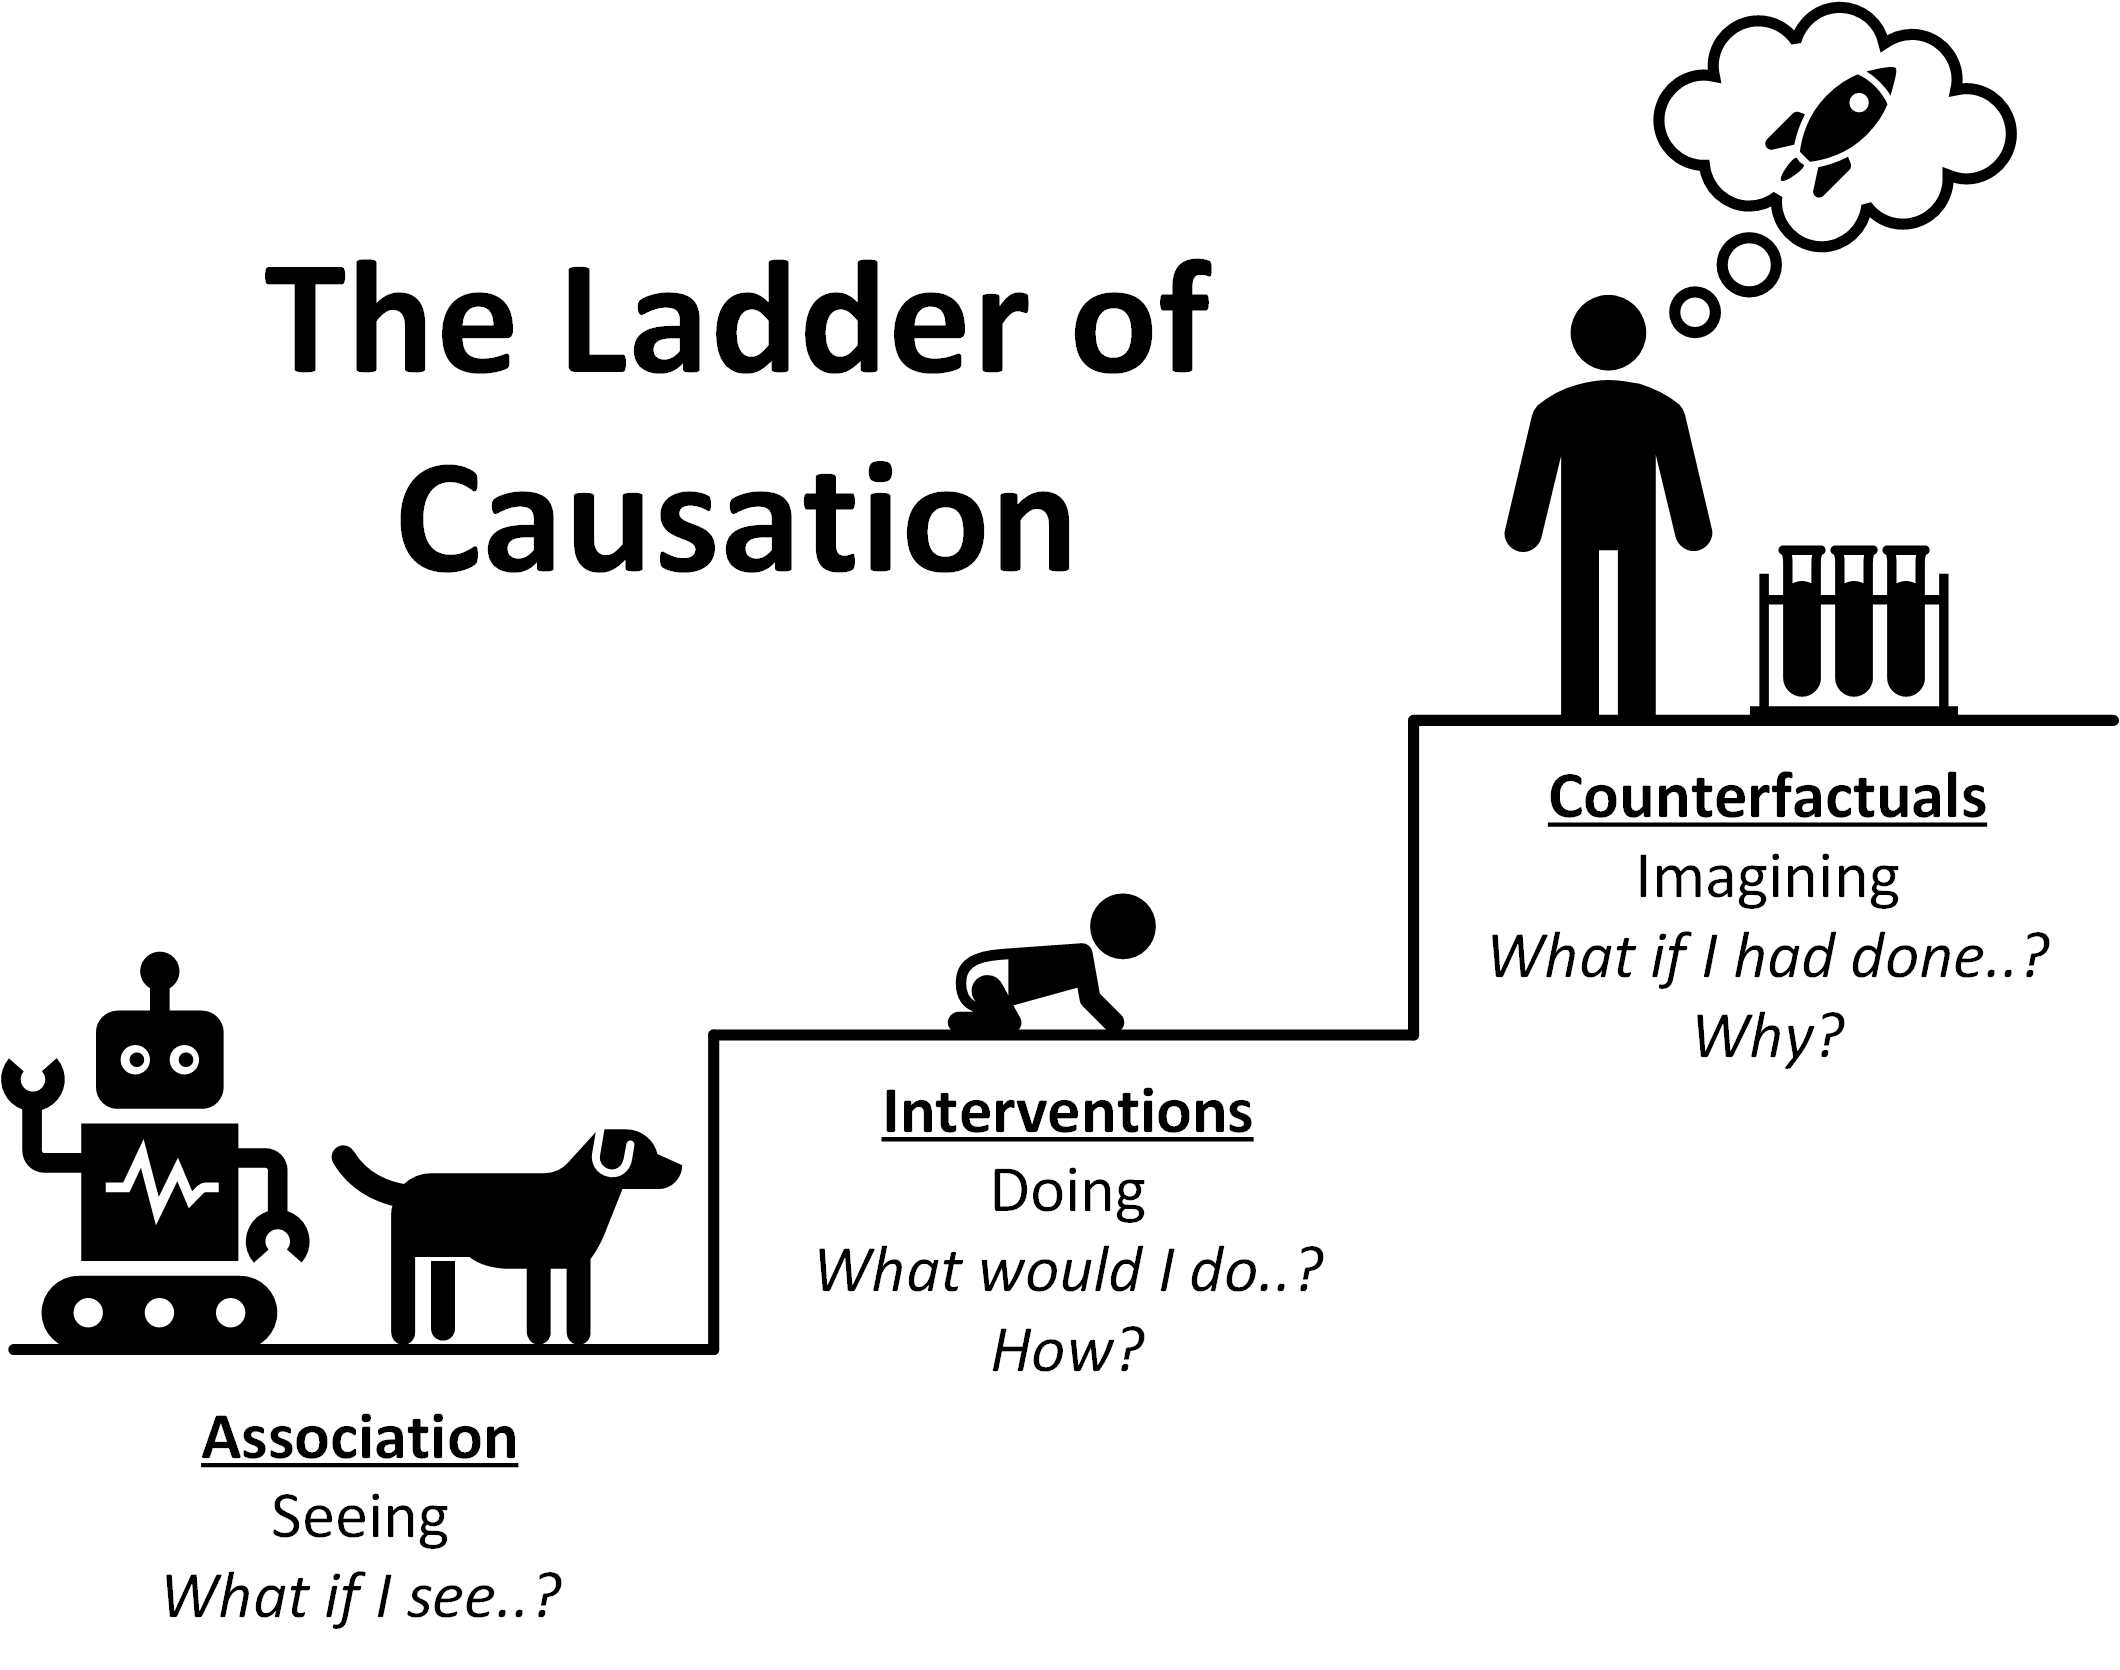

__Example 1: Diabetes Analysis using LiNGAM__

## Dataset Overview


The dataset represents a vital resource for understanding diabetes, a chronic metabolic disorder characterized by elevated levels of blood glucose which, over time, leads to serious damage to the heart, blood vessels, eyes, kidneys, and nerves. The richness of the dataset lies in its comprehensive compilation of clinical, demographic, and lifestyle variables, enabling researchers to explore the multifaceted nature of diabetes management and progression.

Clinical metrics, encompassing fasting blood sugar levels, HbA1c (which tracks blood sugar management over a few months), insulin sensitivity, and cholesterol counts, play a pivotal role in identifying diabetes and tracking its advancement. Information on demographics like age, sex, and ethnic background sheds light on how diabetes affects diverse groups, pointing out possible inequalities in health results. Lifestyle elements, such as eating patterns, exercise frequency, and smoking status, are examined to understand their influence as either risk factors or safeguards in the onset of diabetes.

#### Importance of Causal Inference in Diabetes Research

Causal inference is paramount in diabetes research for identifying the direct and indirect effects of various risk factors on diabetes outcomes. Unlike traditional statistical methods that may only reveal associations, causal inference techniques enable researchers to discern cause-and-effect relationships, thereby providing a more profound understanding of the disease's etiology and progression.

#### LiNGAM for Discovering Causal Structures
Linear Non-Gaussian Acyclic Model (LiNGAM) is a cutting-edge technique in causal discovery that assumes linear relationships among variables and non-Gaussian distributions. LiNGAM is uniquely suited for uncovering causal structures in complex datasets, such as those encountered in diabetes research, where the relationships between variables are often intricate and multidirectional.

By applying LiNGAM to diabetes data, researchers can identify the causal pathways linking risk factors to diabetes outcomes, distinguishing between direct and indirect effects. This insight is critical for designing targeted interventions that address the root causes of diabetes and its complications, ultimately leading to more effective and personalized treatment strategies.

#### Dataset Reference:  https://www.kaggle.com/datasets/willianoliveiragibin/diabetesdataanslysis 

In [2]:
!pip install pandas==1.5.3

In [93]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob


path_to_downloads = 'C:\\Users\\salma\\Downloads\\diabetes.csv'  

dfs = []
names = []
csv_files = glob(path_to_downloads)
for csvs in csv_files:
    dfs.append(pd.read_csv(csvs))
    nms = csvs.split('/')
    names.append(nms[-1])  # Using [-1] to get the last element is a more concise method

# Now `dfs` contains all your dataframes, and `names` has the filenames


In [94]:
def flg_BMI_func(x):
    if x>=25:
        return 1
    else:
        return 0
dfs[0]['flg_highBMI']=dfs[0]['BMI'].apply(flg_BMI_func)

### Data Preprocessing: 

__Selecting Key Features__: In machine learning, choosing the right data is crucial. Eliminating less relevant columns helps focus on the most significant variables for your analysis, either because some data doesn't predict your target outcome or because it's redundant.

__Streamlining the Model:__ By trimming down features, you make your model leaner and quicker to train. This can also enhance its accuracy by avoiding overfitting, where a model is so tuned to training data that it performs poorly on new data. 

__Tailoring Data for Analysis:__ Certain analyses or machine learning algorithms work best with specific data sets. Removing unnecessary features ensures your data is prepped for these particular methods, streamlining the analysis process.

In [95]:
cols=dfs[0].drop(['Outcome','flg_highBMI'],axis=1).columns

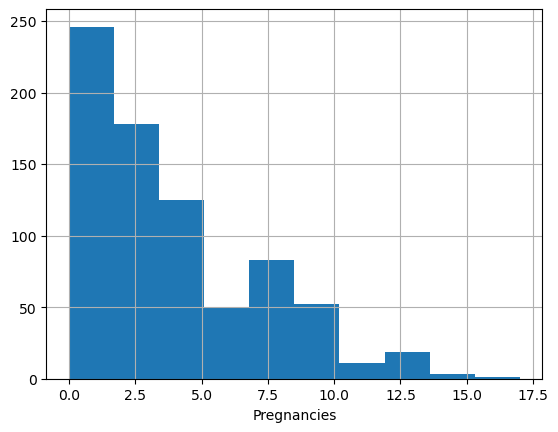

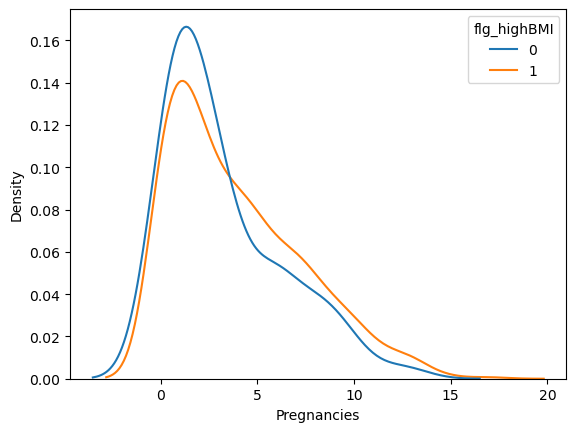

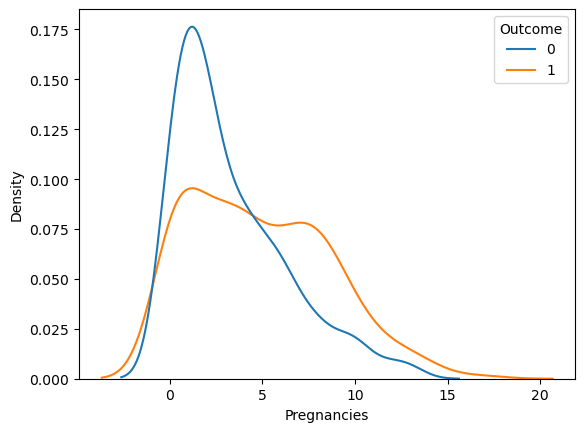

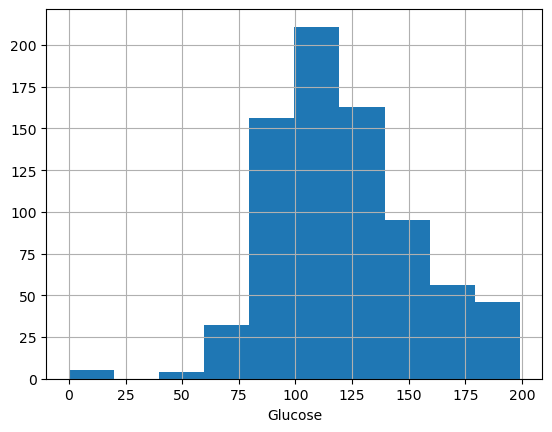

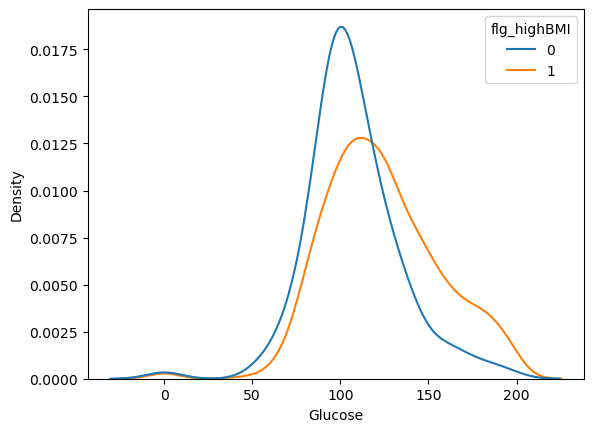

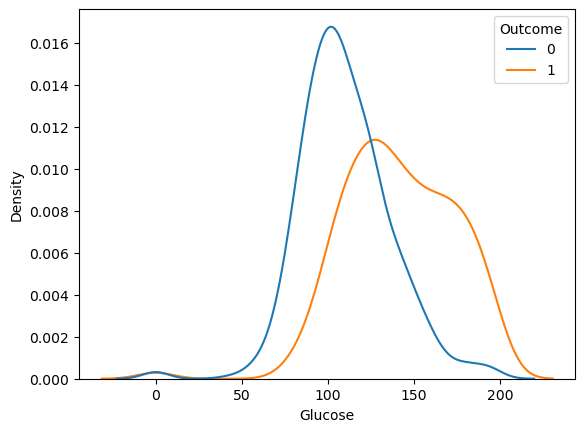

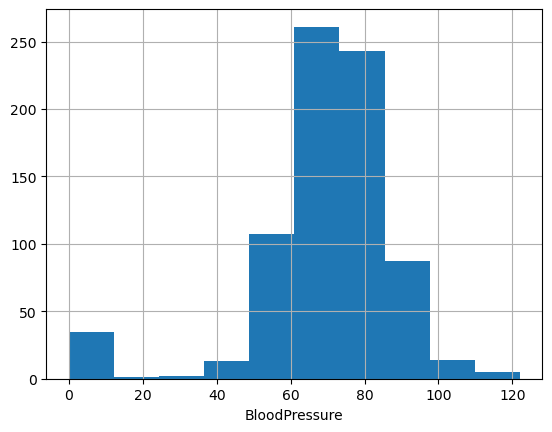

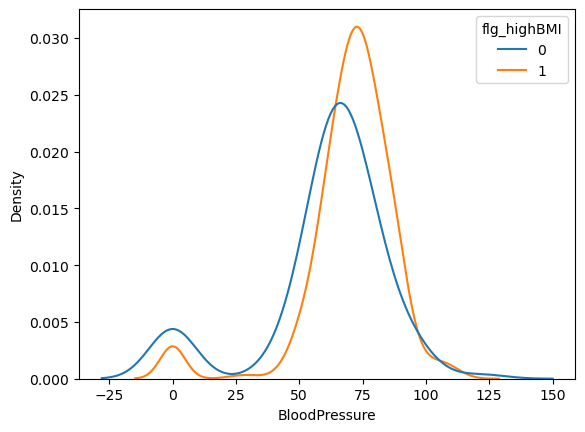

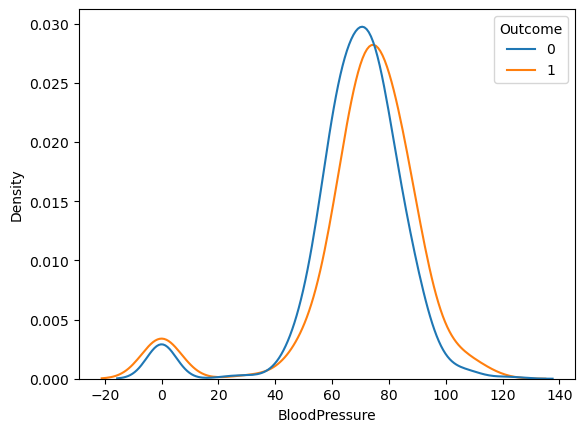

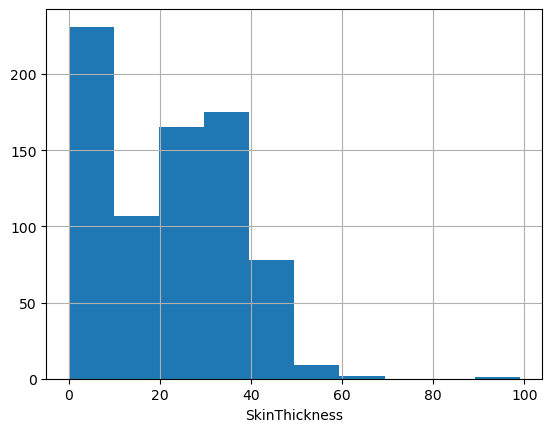

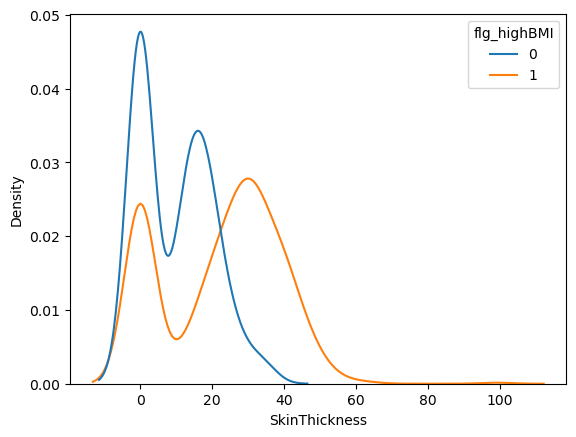

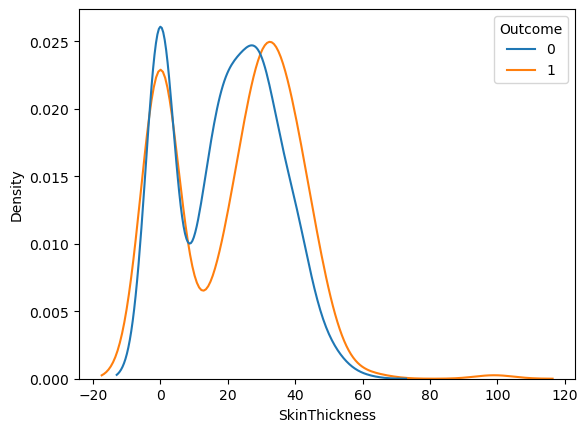

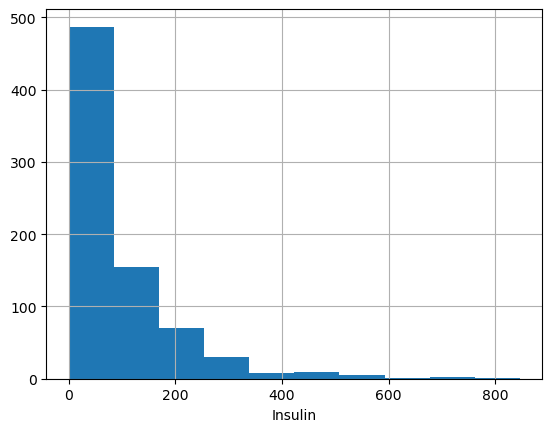

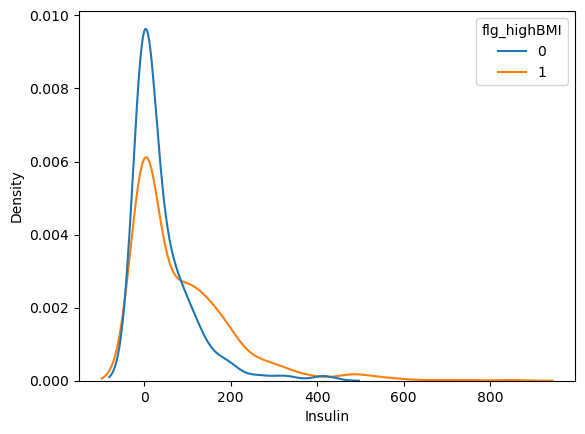

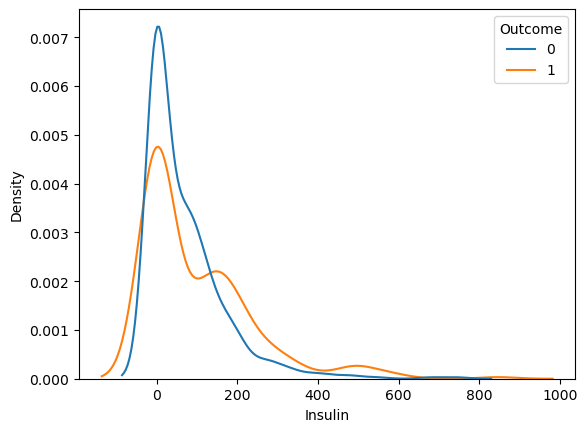

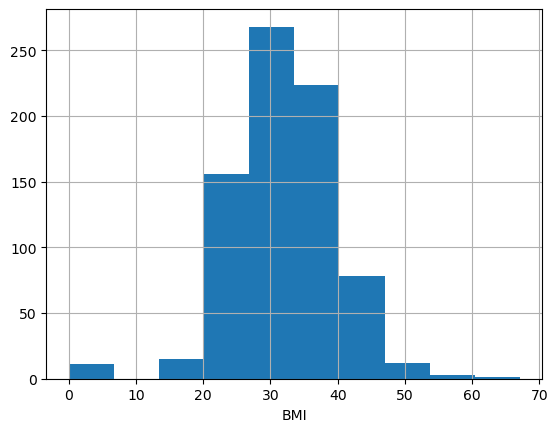

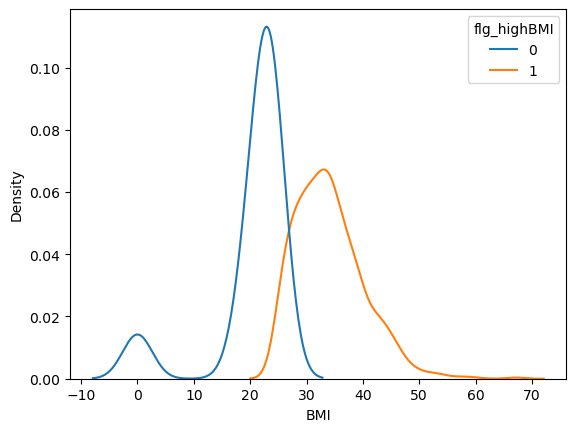

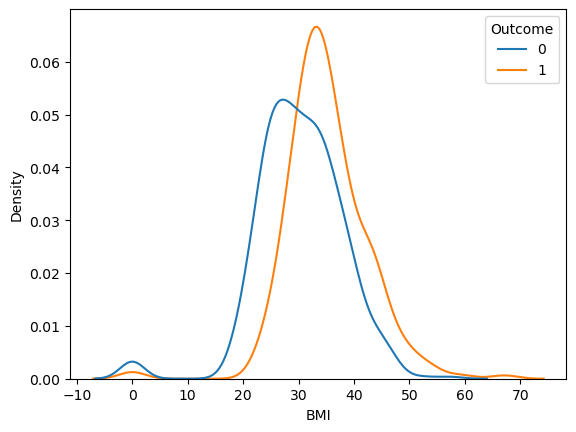

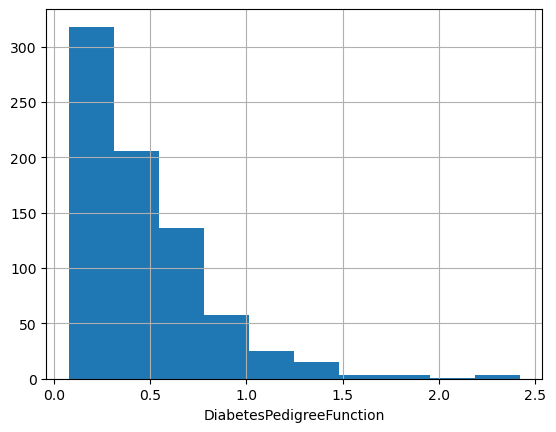

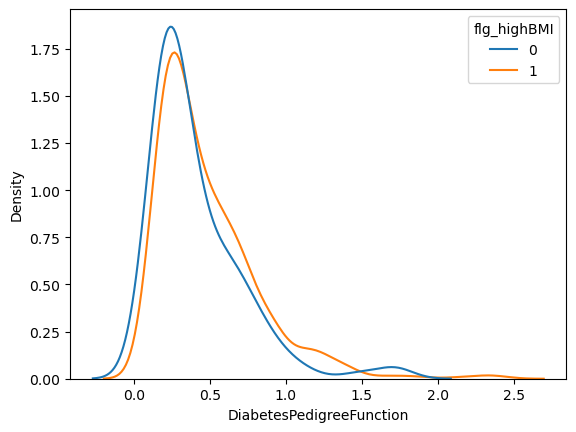

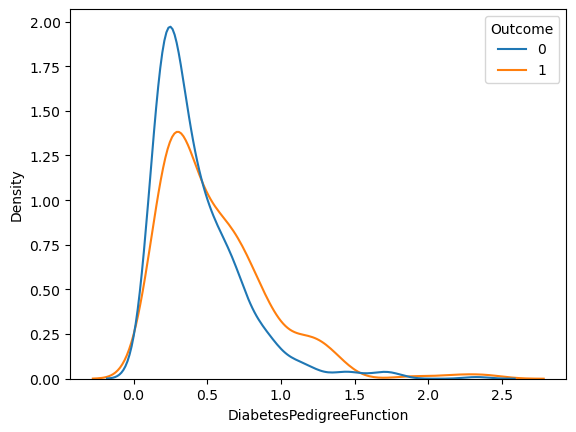

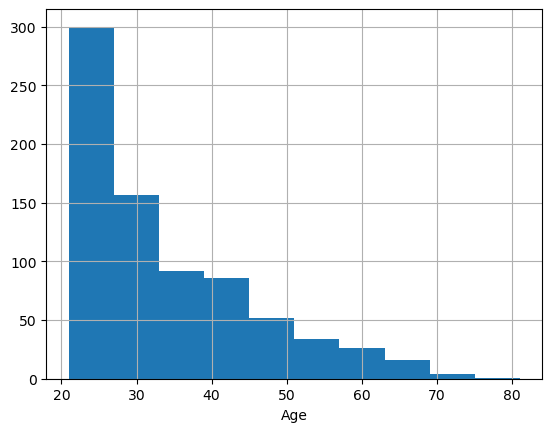

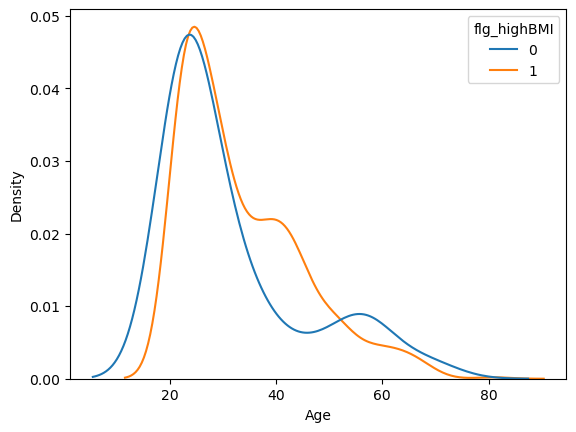

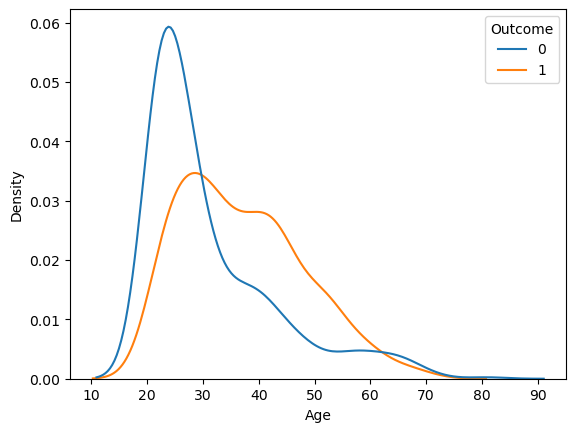

In [96]:
for col in cols:
    dfs[0][col].hist()
    plt.xlabel(col)
    plt.show()
    sns.kdeplot(data=dfs[0],x=col,hue='flg_highBMI',common_norm=False)
    plt.show()
    sns.kdeplot(data=dfs[0],x=col,hue='Outcome',common_norm=False)
    plt.show()

__Exploring Feature Distributions:__

Using histograms and KDE plots helps us get a grip on how data for each feature spreads out, which is key because the shape of data affects many machine learning models. For instance, models that use gradient descent work better when all features are scaled evenly, but models like decision trees don't mind how data is distributed.

_Spotting Links with the Target:_
Through KDE plots that show features by 'flg_highBMI' and 'Outcome', we can visually spot if and how the data's spread changes across different categories. This step is great for seeing how features might connect to our target outcomes, aiding in picking and tweaking features wisely.

_Prepare for model building:_
EDA, or Exploratory Data Analysis, points out things like skewness, outliers, or when we might need to change how we're looking at our features. Fixing these things up front can help our models learn better and give more accurate predictions.

In [97]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

C:\Users\salma\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


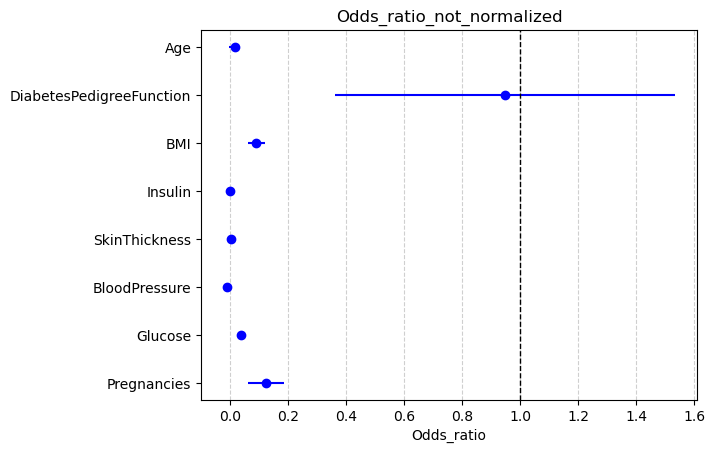

In [98]:
X=dfs[0][cols]
X=sm.add_constant(X)
logit_m=sm.Logit(dfs[0]['Outcome'],X)
result=logit_m.fit()
odds_ratios=result.params
conf_int=result.conf_int()
conf_int.columns=['Lower','Upper']
err_len=(conf_int['Upper']-conf_int['Lower']).drop('const')/2
odds_ratios=odds_ratios.drop('const')
plt.errorbar(odds_ratios,range(len(odds_ratios)),xerr=err_len,fmt='o',color='b')
plt.axvline(x=1,color='k',linestyle='--',label='Odds_Ratio=1',linewidth=1)
plt.title('Odds_ratio_not_normalized')
plt.xlabel('Odds_ratio')
plt.yticks(range(len(odds_ratios)),labels=cols)
plt.grid(axis='x',linestyle='--',alpha=0.6)
plt.show()

In [99]:
!pip install pgmpy==0.1.11

C:\Users\salma\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\salma\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\salma\anaconda3\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [100]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import ConstraintBasedEstimator
from pgmpy.estimators import BicScore

In [101]:
df_disc=dfs[0].copy()
for c in list(cols):
    df_disc[c]=pd.cut(df_disc[c],5,labels=[1,2,3,4,5])

In [102]:
df_disc=df_disc[list(cols)+['Outcome']]

In [103]:
import warnings

In [104]:
warnings.filterwarnings('ignore')
est = ConstraintBasedEstimator(df_disc)

skel, seperating_sets = est.estimate_skeleton(significance_level=0.01)
print("Undirected edges: ", skel.edges())

pdag = est.skeleton_to_pdag(skel, seperating_sets)
print("PDAG edges:", pdag.edges())

model = est.pdag_to_dag(pdag)
print("DAG edges:", model.edges())
warnings.filterwarnings('default')

Undirected edges:  [('Pregnancies', 'Age'), ('Glucose', 'Outcome'), ('BloodPressure', 'BMI'), ('SkinThickness', 'BMI'), ('Insulin', 'DiabetesPedigreeFunction')]
PDAG edges: [('Pregnancies', 'Age'), ('Glucose', 'Outcome'), ('BloodPressure', 'BMI'), ('SkinThickness', 'BMI'), ('Insulin', 'DiabetesPedigreeFunction'), ('DiabetesPedigreeFunction', 'Insulin'), ('Age', 'Pregnancies'), ('Outcome', 'Glucose')]
DAG edges: [('BloodPressure', 'BMI'), ('SkinThickness', 'BMI'), ('DiabetesPedigreeFunction', 'Insulin'), ('Age', 'Pregnancies'), ('Outcome', 'Glucose')]


In [105]:
import networkx as nx

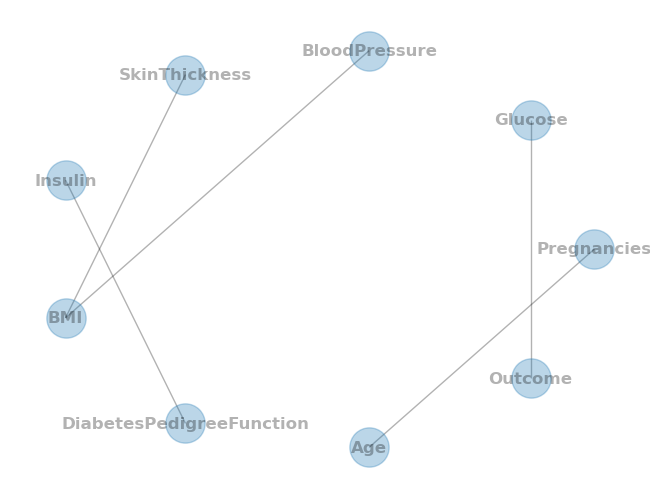

In [106]:
warnings.filterwarnings('ignore')
# Undirected edges（方向性なし）可視化
G = nx.Graph()
G.add_nodes_from(list(cols)+['Outcome']) # ノード
G.add_edges_from(skel.edges()) # 辺
nx.draw_circular(G, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight='bold')
plt.show()
warnings.filterwarnings('default')

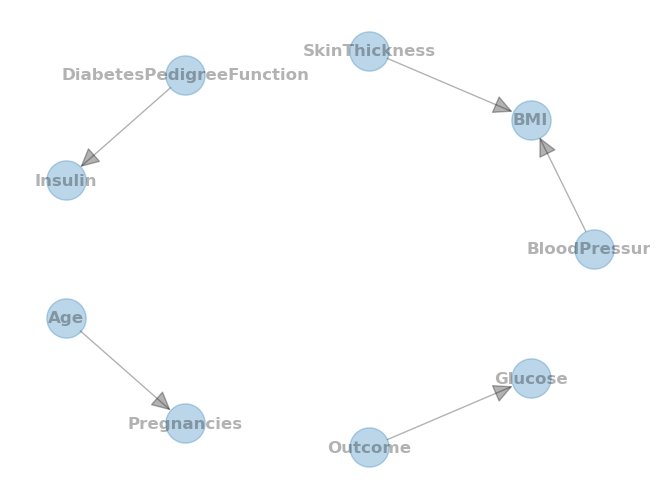

In [107]:
DAG_model = BayesianModel(model.edges())
nx.draw_circular(DAG_model, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight='bold')
plt.show()

In [108]:
DAG_model.get_cpds()

[]

In [109]:
df_cont=dfs[0].copy()
df_cont=df_cont[list(cols)+['Outcome']]

In [110]:
import graphviz

In [111]:
!pip install lingam

In [112]:
import lingam
from lingam.utils import make_dot

C:\Users\salma\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\salma\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
C:\Users\salma\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs


In [113]:
import graphviz

#### Generating Directed Graph of Variable Relationships

In [114]:
np.set_printoptions(precision=3, suppress=True)

In [115]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.5
    dirs = np.where(idx)
    d = graphviz.Digraph(format='png', engine='dot')
    # フォント設定
    d.attr('node', fontname="MS Gothic", fontsize="10")
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=f'{coef:.2f}', fontsize="10")
    return d

#### Applying Direct LiNGAM Model for Causal Inference

Direct LiNGAM Model:  It infers the causal structure of the data by estimating a directed acyclic graph (DAG) that represents the causal relationships between variables.By fitting the Direct LiNGAM model to the dataset, I'll be attempting to discover the underlying causal relationships among the continuous variables.

Fitting the Model: During the fitting process, the model estimates the causal structure of the data by identifying the direction and strength of causal relationships between variables. After fitting, the model contains information about the learned causal structure, which can be used for further analysis or interpretation.



In [116]:
model=lingam.DirectLiNGAM()
model.fit(df_cont)

C:\Users\salma\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [117]:
pip install graphviz

C:\Users\salma\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\salma\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
C:\Users\salma\anaconda3\Lib\threading.py:979: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs


In [118]:
import graphviz

### Causal Inference and Visualization of Variable Relationships

__Causal Inference:__ We apply the Direct LiNGAM model to uncover causal relationships between variables in the dataset.

__Visualization:__ We visualize the variable relationships using a directed graph, providing a clear representation of causality between variables.

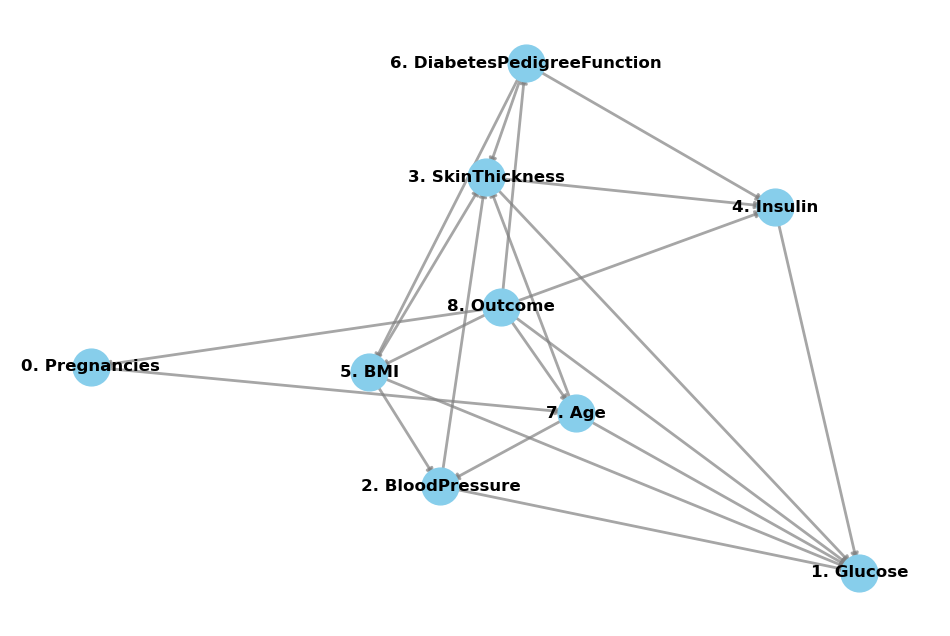

In [119]:
def make_graph(adjacency_matrix, labels=None):
    G = nx.DiGraph()
    if labels is None:
        labels = [f'x{i}' for i in range(len(adjacency_matrix))]
    G.add_nodes_from(labels)
    
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix)):
            if adjacency_matrix[i, j] != 0:
                G.add_edge(labels[j], labels[i])  # Reverse order to match the matrix convention
    
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes with fixed seed for reproducibility
    plt.figure(figsize=(12, 8))
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
    # edges
    nx.draw_networkx_edges(G, pos, width=2, edge_color="gray", alpha=0.7)
    # labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", font_weight="bold")

    plt.axis('off')
    plt.show()

# Example usage
make_graph(model.adjacency_matrix_, labels)

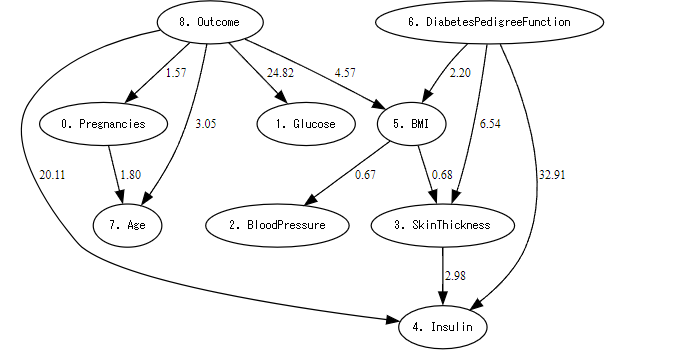

### Conclusion of LiNGAM Causality Analysis on Diabetes-Related Factors

Our LiNGAM analysis of the dataset uncovers intricate causal connections among variables typically associated with diabetes outcomes. The resulting directed acyclic graph sheds light on how specific factors may directly or indirectly influence the likelihood of a diabetes diagnosis, denoted as 'Outcome'.

#### Key Insights:

__Direct Effects on Outcome:__
The analysis highlights 'Glucose' levels as the most significant direct influencer of 'Outcome', followed by 'DiabetesPedigreeFunction', 'BMI', and 'Age'. These findings align with medical knowledge, emphasizing the pivotal role of glucose levels in diagnosing diabetes, with other factors like BMI and age also playing crucial roles.

__Interconnected Risk Factors:__
Notably, 'BMI' is shown to be influenced by both 'Glucose' and 'DiabetesPedigreeFunction', suggesting a link between genetic factors, glucose levels, and body mass index in contributing to diabetes outcomes.

__Pregnancies and Age:__
An intriguing causal pathway from 'Pregnancies' to 'Age' indicates a chronological relationship, potentially reflecting the impact of age on the number of pregnancies experienced.

__Biological Pathways:__
While 'Insulin' and 'SkinThickness' are not directly linked to 'Outcome', they are influenced by 'Glucose', implying their importance in the biological pathways related to diabetes.

## Implications for the Dataset:

__Predictive Modeling:__
Understanding these causal pathways facilitates the development of predictive models for estimating an individual's diabetes risk more accurately based on factors such as glucose levels, BMI, and family history.

__Targeted Interventions:__
By comprehending the primary drivers of diabetes outcomes, interventions can be tailored more effectively. For instance, controlling glucose levels could potentially reduce the risk of diabetes given its central role in the causal network.

__Healthcare Strategies:__
Healthcare providers can benefit from insights into the significance of monitoring glucose and BMI, given their strong direct and indirect impacts on diabetes outcomes.

This analysis underscores the importance of causal inference techniques in elucidating complex relationships within datasets, providing valuable insights for healthcare decision-making and predictive modeling efforts.

__Example 2: Water Quality Causal Inference using LiNGAM__

### Dataset Overview: Water Pond and Tank Management in 2021

The "Water_pond_tanks_2021.csv" dataset emerges as an essential tool for comprehending the management, distribution, and challenges of water resources within pond and tank systems across various regions in 2021. This dataset is a treasure trove of information for environmental scientists, water resource managers, and policy-makers, providing a detailed snapshot of water quality, capacity, usage patterns, and conservation efforts.

__Key Metrics and Variables:__

This dataset meticulously records several key metrics and variables crucial for the assessment and strategic planning of water resources. These include:

__Water Quality Indicators:__ Parameters such as pH levels, turbidity, dissolved oxygen, and the presence of contaminants (e.g., nitrates, phosphates) offer insights into the health and viability of water bodies for various uses.
Capacity and Volume: Data on the size, volume, and capacity utilization of ponds and tanks reflect on water availability and storage efficiency.
__Usage Patterns:__ Information on water withdrawal, usage by sector (agricultural, industrial, domestic), and evaporation rates highlight demand dynamics and stress points on water resources.
__Conservation Measures:__ Records of rainwater harvesting, recharge structures, and other conservation practices shed light on efforts to sustain water availability and quality.
Importance of Sustainable Management in Water Resources

Understanding and managing water resources sustainably is crucial to addressing the challenges posed by climate change, population growth, and increased demand across sectors. The "Water_pond_tanks_2021.csv" dataset plays a pivotal role in identifying trends, potential risks, and opportunities for enhancing water security and ecosystem health.

### Applying Geospatial Analysis for Water Resource Management

Geospatial analysis stands out as a powerful tool for visualizing and analyzing the spatial characteristics of ponds and tanks, including their distribution, accessibility, and relation to surrounding land uses and communities. By integrating this dataset with geospatial technologies, researchers and policymakers can gain unparalleled insights into the spatial dynamics of water resources, facilitating targeted interventions and strategic planning.

#### Database reference: https://www.kaggle.com/datasets/balabaskar/water-quality-data-india

In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/water-quality-data-india/Water_pond_tanks_2021.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Data Preparation and Initial Exploration

__Loading the Dataset:__ This step involves importing the dataset into the analysis environment. Theoretical explanation: This phase is critical for setting the foundation of our analysis, ensuring that the dataset is correctly loaded for manipulation and inspection.

__Preliminary Data Inspection:__  Quick examination of the dataset to understand its structure, such as the number of observations, types of variables, and any immediately apparent trends or anomalies. Theoretical explanation: Initial data inspection is essential for gaining an overview of the dataset's characteristics, which informs the subsequent steps of the analysis and any necessary data preprocessing.

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [135]:

file_path = 'Water_pond_tanks_2021.csv'

try:
    # Read the CSV file with an alternative encoding
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
   
    print(df.head())
except FileNotFoundError:
    
    print(f"The file {file_path} was not found. Please check the filename and directory.")
except UnicodeDecodeError:
    # If there's a decoding error, inform the user
    print(f"There was a problem decoding the file {file_path}. Please check the file encoding.")


   STN\nCode                        Name of Monitoring Location  \
0     4368.0      KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)   
1     2353.0  KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...   
2     1790.0                       PULICATE LAKE , NELLORE DIST   
3     4391.0      CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI   
4     4921.0           ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR   

  Type Water Body      State Name  Temperature\n?C (Min)  \
0            LAKE  ANDHRA PRADESH                   24.0   
1            LAKE  ANDHRA PRADESH                   26.0   
2            LAKE  ANDHRA PRADESH                   18.0   
3            TANK  ANDHRA PRADESH                   22.0   
4         Wetland  ANDHRA PRADESH                   21.0   

   Temperature\n?C (Max) Dissolved Oxygen (mg/L) (Min)  \
0                   27.0                           3.2   
1                   29.0                           3.0   
2                   24.0                           4.2   
3   

In [136]:
df.head()

STN\nCode                        Name of Monitoring Location  \
0     4368.0      KOLLERU LAKE KOKKIRAYALANKA (V), KAILALUR (M)   
1     2353.0  KONDAKARLA-AAVA LAKE, PARAWADA PHARMA CITY, VI...   
2     1790.0                       PULICATE LAKE , NELLORE DIST   
3     4391.0      CHENGAMBAKAM TANK IN SRI CITY SEZ,\nTIRUPATHI   
4     4921.0           ANNAMAYYA PROJECT ON CHEYYERU\nRESERVOIR   

  Type Water Body      State Name  Temperature\n?C (Min)  \
0            LAKE  ANDHRA PRADESH                   24.0   
1            LAKE  ANDHRA PRADESH                   26.0   
2            LAKE  ANDHRA PRADESH                   18.0   
3            TANK  ANDHRA PRADESH                   22.0   
4         Wetland  ANDHRA PRADESH                   21.0   

   Temperature\n?C (Max) Dissolved Oxygen (mg/L) (Min)  \
0                   27.0                           3.2   
1                   29.0                           3.0   
2                   24.0                           4.2   
3                   29.0                           5.4   
4                   30.0                           5.4   

  Dissolved Oxygen (mg/L) (Max) pH (Min)  pH (Max)  \
0                           6.5      7.0       8.0   
1                           6.8      6.9       7.8   
2                           6.0      7.2       8.2   
3                           6.2      6.3       7.9   
4                           6.5      7.3       8.0   

  Conductivity (?mhos/cm) (Min) Conductivity (?mhos/cm) (Max)  \
0                           245                          5160   
1                           599                          1179   
2                         28000                         56900   
3                           180                           476   
4                           496                           734   

  BOD (mg/L) (Min) BOD (mg/L) (Max) Nitrate N + Nitrite N(mg/L) (Min)  \
0              1.6              3.2                              1.02   
1              1.9              4.6                              0.77   
2              2.4              2.8                              1.20   
3              1.0              2.5                              0.34   
4              1.0              2.3                              0.35   

  Nitrate N + Nitrite N(mg/L) (Max) Fecal Coliform (MPN/100ml) (Min)  \
0                              3.60                                9   
1                              3.56                               15   
2                              1.64                                3   
3                              2.30                               24   
4                              1.00                               43   

  Fecal Coliform (MPN/100ml) (Max) Total Coliform (MPN/100ml) (Min)  \
0                               21                              120   
1                               23                              150   
2                                3                               47   
3                              365                              170   
4                              289                              240   

  Total Coliform (MPN/100ml) (Max)  
0                              210  
1                              240  
2                              150  
3                              549  
4                              727

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      620 non-null    object 
 7   Dissolved Oxygen (mg/L) (Max)      620 non-null    object 
 8   pH (Min)                           620 non-null    object 
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      618 non-null    object 
 11  Conductivity (?mhos/cm) (Max)      618 non-null    object 

## Data PreProcessing:

__Handling Missing Values:__ Identifying and addressing missing data within the dataset.  Missing data can significantly impact the reliability of causal analysis. Decisions on how to handle missing values—whether through imputation, deletion, or other methods—must consider the potential biases introduced and the nature of the missingness.

__Variable Transformation and Selection:__ Selecting relevant variables for the analysis and potentially transforming them to meet the assumptions of the causal discovery method. Theoretical explanation: The choice and transformation of variables are pivotal, as they need to accurately reflect the phenomena of interest and fulfill the prerequisites of the causal modeling technique applied.

In [138]:
df=df.replace('-', np.nan)

In [139]:
df=df.replace('\n4', '',regex=True)

In [140]:
df.iloc[:,4:19]=df.iloc[:,4:19].astype(float)

In [141]:
df['Total Coliform (MPN/100ml) (Max)']=df['Total Coliform (MPN/100ml) (Max)'].astype(float)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   STN
Code                           619 non-null    float64
 1   Name of Monitoring Location        620 non-null    object 
 2   Type Water Body                    620 non-null    object 
 3   State Name                         620 non-null    object 
 4   Temperature
?C (Min)               617 non-null    float64
 5   Temperature
?C (Max)               617 non-null    float64
 6   Dissolved Oxygen (mg/L) (Min)      618 non-null    float64
 7   Dissolved Oxygen (mg/L) (Max)      618 non-null    float64
 8   pH (Min)                           620 non-null    float64
 9   pH (Max)                           620 non-null    float64
 10  Conductivity (?mhos/cm) (Min)      615 non-null    float64
 11  Conductivity (?mhos/cm) (Max)      615 non-null    float64

## Visualizing Water Quality Parameters: 

In our endeavor to understand the complex dynamics of aquatic ecosystems, it is imperative to scrutinize the various water quality parameters that play a pivotal role in sustaining aquatic life and maintaining the ecological balance. The distribution of these parameters provides insights into the health of water bodies, highlighting potential areas of concern that may require intervention or further study. In this section, we explore the distribution of key water quality indicators, each of which contributes to our holistic understanding of the ecosystem.

_Temperature:_
Temperature is a fundamental environmental factor influencing the metabolic rates of aquatic organisms and the solubility of gases in water. The distribution of temperature variations, both minimum and maximum, can indicate the thermal stability of the water body and its suitability for different forms of aquatic life.

_Dissolved Oxygen_
Dissolved oxygen is crucial for the survival of aerobic aquatic organisms. Its distribution reflects the oxygenation levels of the water, which can be affected by temperature, photosynthetic activity, and organic decomposition. Low levels of dissolved oxygen can lead to hypoxic conditions detrimental to aquatic life.

_pH Levels_
The pH of water influences the chemical composition and biological processes within aquatic ecosystems. The distribution of pH levels, from acidic to basic, affects the solubility of nutrients and toxins, impacting the health and diversity of aquatic organisms.

_Conductivity_
Conductivity measures the water's ability to conduct electrical current, serving as an indicator of the presence of inorganic dissolved solids. This parameter helps assess water quality concerning salinity and the concentration of ionized substances.

_Biochemical Oxygen Demand (BOD)_
BOD indicates the amount of oxygen required for the biological decomposition of organic matter in water. High BOD levels can signify substantial organic pollution, leading to decreased oxygen availability for aquatic life.

_Nitrate and Nitrite Nitrogen_
Nitrate and nitrite levels reflect the nutrient status of the water body, which can influence algal blooms and eutrophication. Monitoring these nutrients helps in assessing the impact of agricultural runoff and wastewater discharge.

_Coliform Counts_
Fecal and total coliform counts are indicators of microbiological contamination, potentially pointing to the presence of pathogenic organisms. These parameters are essential for evaluating water safety and public health risks.

By analyzing the distribution of these parameters, we gain valuable insights into the current state of the water body and its capacity to support a healthy and diverse aquatic ecosystem. The graphical representation of these distributions aids in visualizing the variability and potential outliers within each water quality parameter, facilitating a more nuanced understanding of the ecological status and guiding targeted research and conservation efforts.df['State Name'].unique()


## Data Visualisation

__1. Distplot by Features:__

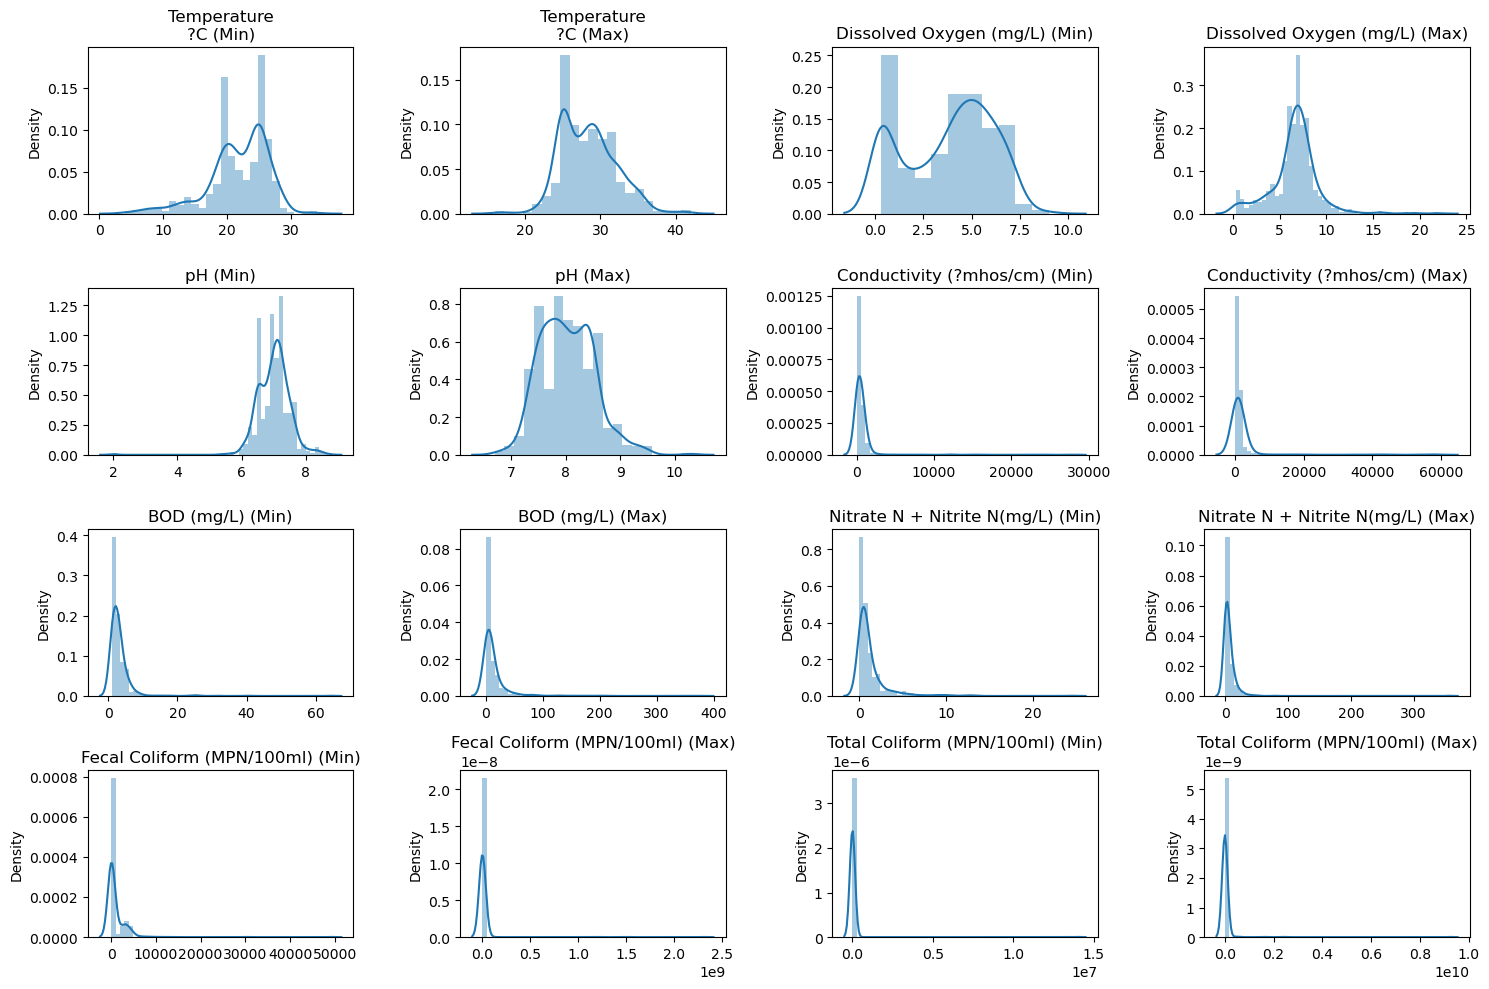

In [145]:
col=['Temperature\n?C (Min)', 'Temperature\n?C (Max)',
       'Dissolved Oxygen (mg/L) (Min)', 'Dissolved Oxygen (mg/L) (Max)',
       'pH (Min)', 'pH (Max)', 'Conductivity (?mhos/cm) (Min)',
       'Conductivity (?mhos/cm) (Max)', 'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)',
       'Nitrate N + Nitrite N(mg/L) (Min)',
       'Nitrate N + Nitrite N(mg/L) (Max)', 'Fecal Coliform (MPN/100ml) (Min)',
       'Fecal Coliform (MPN/100ml) (Max)', 'Total Coliform (MPN/100ml) (Min)',
       'Total Coliform (MPN/100ml) (Max)']
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(4,4,i+1)
    plt.title(col[i])
    sns.distplot(df,x=df[col[i]])
plt.tight_layout()
plt.show()

__2. Boxplot Features:__ 

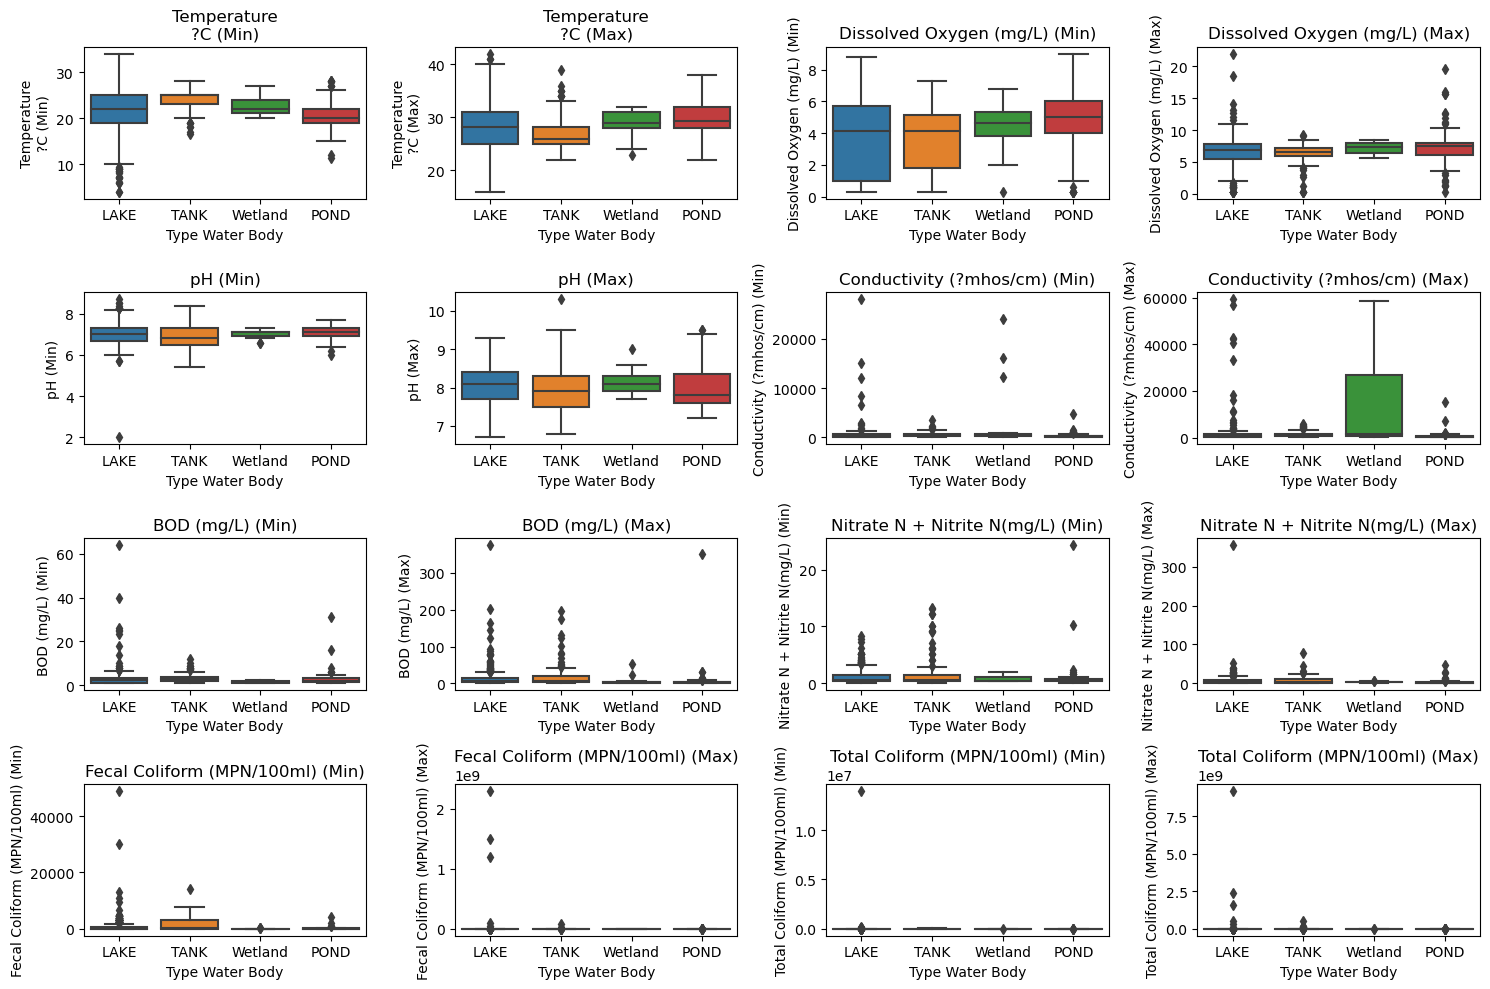

In [147]:
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(4,4,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,y=df[col[i]],x=df['Type Water Body'])
plt.tight_layout()
plt.show()

__3. Pairplot by Type Water Body:__

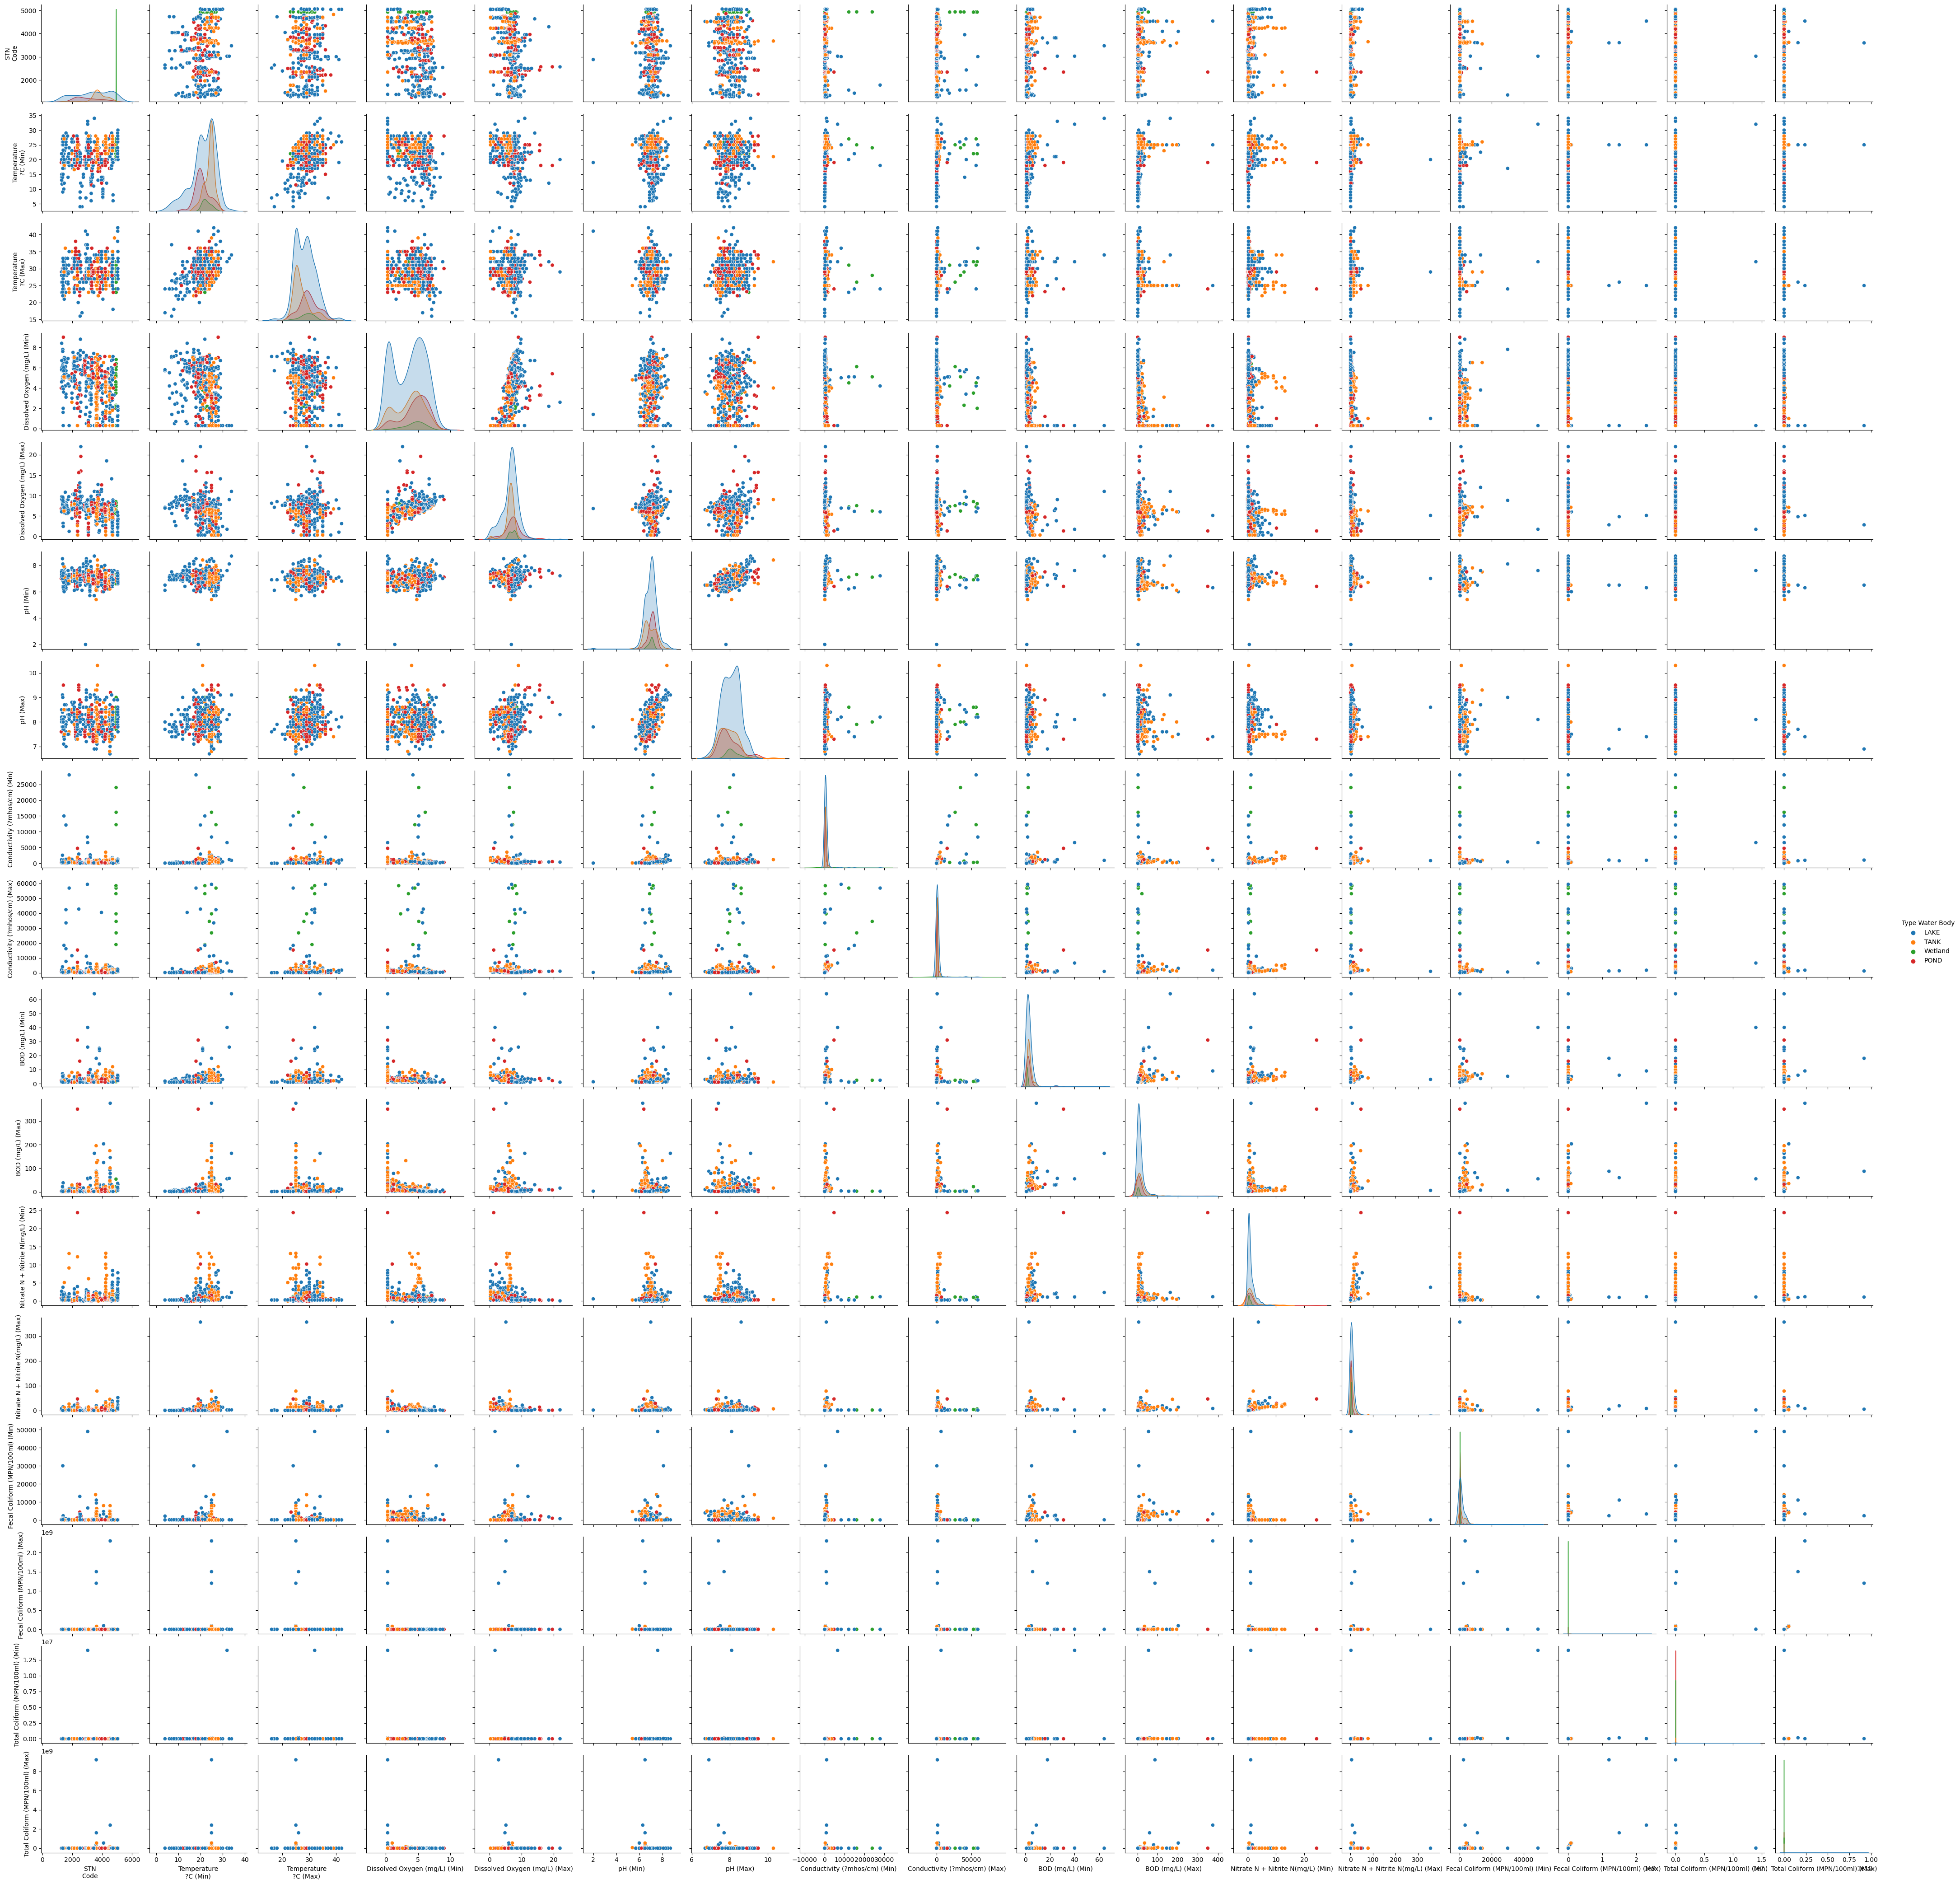

In [148]:
sns.pairplot(df,hue='Type Water Body');

In [152]:
pip install lingam

Note: you may need to restart the kernel to use updated packages.


In [151]:
pip install pygam

In [153]:
pip install factor_analyzer

     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------------------------------------- 42.8/42.8 kB 99.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing met

In [162]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 65.4 kB/s eta 0:00:01
   ------------------------------ --------- 61.4/81.9 kB 148.8 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81

In [164]:
from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

### Data PreProcessing to perform LiNGAM: 

In [165]:
df1 = df.drop(["STN\nCode","Name of Monitoring Location"], axis=1)

In [166]:
df1 = df1.dropna(how='any')

In [167]:
display(pd.DataFrame(df1.isnull().sum()).T)

Type Water Body  State Name  Temperature\n?C (Min)  Temperature\n?C (Max)  \
0                0           0                      0                      0   

   Dissolved Oxygen (mg/L) (Min)  Dissolved Oxygen (mg/L) (Max)  pH (Min)  \
0                              0                              0         0   

   pH (Max)  Conductivity (?mhos/cm) (Min)  Conductivity (?mhos/cm) (Max)  \
0         0                              0                              0   

   BOD (mg/L) (Min)  BOD (mg/L) (Max)  Nitrate N + Nitrite N(mg/L) (Min)  \
0                 0                 0                                  0   

   Nitrate N + Nitrite N(mg/L) (Max)  Fecal Coliform (MPN/100ml) (Min)  \
0                                  0                                 0   

   Fecal Coliform (MPN/100ml) (Max)  Total Coliform (MPN/100ml) (Min)  \
0                                 0                                 0   

   Total Coliform (MPN/100ml) (Max)  
0                                 0

In [168]:
oe = ce.ordinal.OrdinalEncoder(
    cols=df1.select_dtypes(include="object")
    )

df_en = oe.fit_transform(df1)

In [169]:
df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

18
{'Type Water Body': 0, 'State Name': 1, 'Temperature\n?C (Min)': 2, 'Temperature\n?C (Max)': 3, 'Dissolved Oxygen (mg/L) (Min)': 4, 'Dissolved Oxygen (mg/L) (Max)': 5, 'pH (Min)': 6, 'pH (Max)': 7, 'Conductivity (?mhos/cm) (Min)': 8, 'Conductivity (?mhos/cm) (Max)': 9, 'BOD (mg/L) (Min)': 10, 'BOD (mg/L) (Max)': 11, 'Nitrate N + Nitrite N(mg/L) (Min)': 12, 'Nitrate N + Nitrite N(mg/L) (Max)': 13, 'Fecal Coliform (MPN/100ml) (Min)': 14, 'Fecal Coliform (MPN/100ml) (Max)': 15, 'Total Coliform (MPN/100ml) (Min)': 16, 'Total Coliform (MPN/100ml) (Max)': 17}


In [170]:
prior_knowledge = make_prior_knowledge(
    18,
    exogenous_variables = [df_dict["Type Water Body"], df_dict["State Name"]],
    paths = [
             [df_dict["pH (Max)"], df_dict["pH (Min)"],[df_dict['Temperature\n?C (Min)'],df_dict['Temperature\n?C (Max)'],df_dict['Dissolved Oxygen (mg/L) (Min)'],df_dict['Dissolved Oxygen (mg/L) (Max)']]],
             ],     
                           
)

### Causal Discovery with LiNGAM

__Applying LiNGAM:__ Execution of the LiNGAM algorithm to uncover the causal structure among the selected variables. LiNGAM, by exploiting the non-Gaussian distribution of data and the acyclic nature of causal relationships, allows for the identification of the causal order among variables, revealing how different factors influence each other.

__Interpreting the Causal Graph:__ Analysis of the resulting causal graph to understand the direction and nature of the relationships uncovered. Theoretical explanation: The causal graph is a visual representation of the inferred causal relationships, where directed edges signify the direction of causality. Interpreting this graph provides insights into the underlying causal mechanisms within the ecosystem being studied.

In [172]:
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df_en)

In [177]:
import matplotlib.pyplot as plt
import networkx as nx

In [179]:
adj_matrix = model.adjacency_matrix_

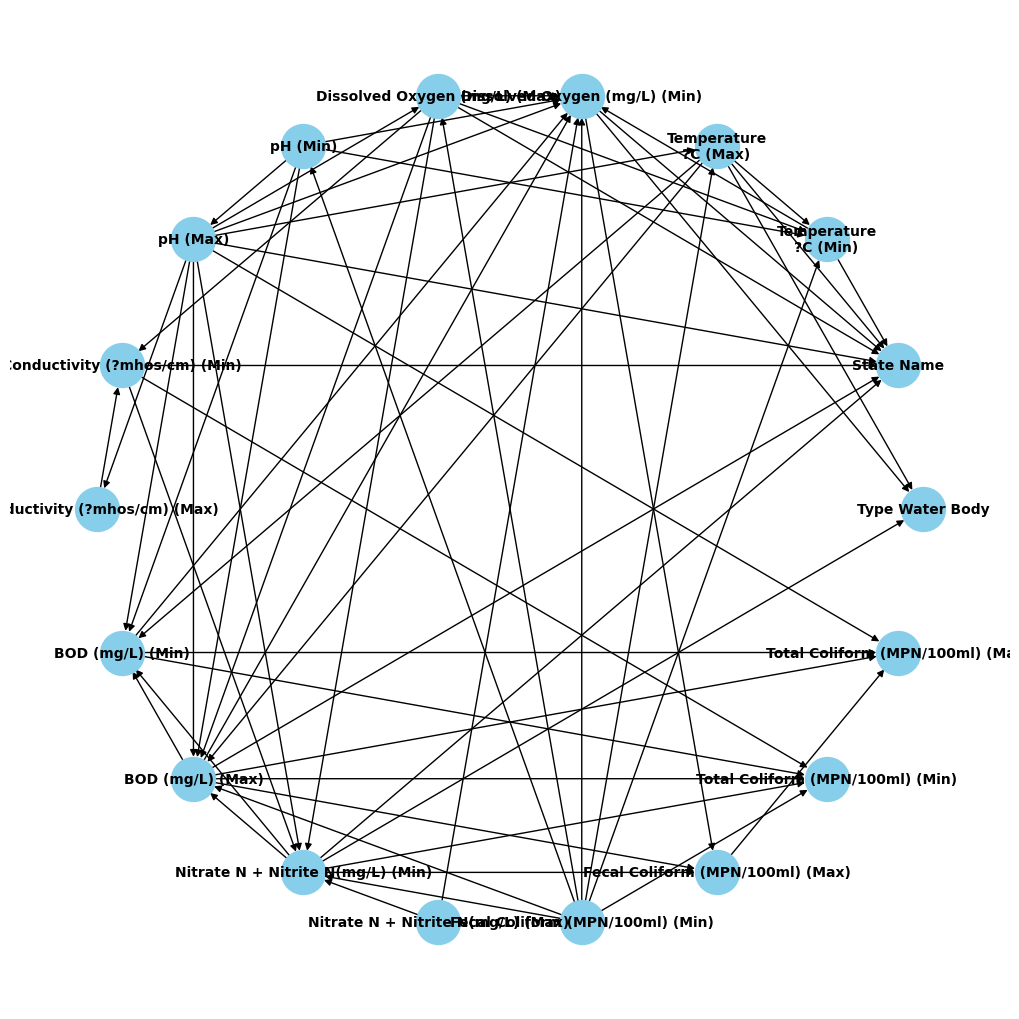

In [183]:
# Assuming 'model.adjacency_matrix_' is your numpy array and 'df_en.columns.to_list()' gives you the node labels

# If 'model.adjacency_matrix_' is a numpy array:
your_numpy_array = model.adjacency_matrix_
your_labels_list = df_en.columns.to_list()

# Convert the numpy array to a pandas DataFrame for better handling
adj_matrix = pd.DataFrame(your_numpy_array, index=your_labels_list, columns=your_labels_list)

# Create a Directed Graph from the adjacency matrix
G = nx.from_pandas_adjacency(adj_matrix, create_using=nx.DiGraph())

# Use the circular layout for a cleaner look
pos = nx.circular_layout(G)

# Adjust figure size for better visibility
plt.figure(figsize=(10, 10))

# Draw nodes, edges, and labels
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

# Increase space around the plot for better label readability
plt.tight_layout()

# Show plot
plt.show()


## Conclusion: 


TheLiNGAM analysis to the water pond dataset hence represents a significant advancement in our understanding of the causal dynamics within aquatic ecosystems. Through the meticulous examination of the dataset, which encompasses various environmental factors and biological indicators, this analysis has illuminated the intricate web of causality that governs the ecological balance of water ponds.

One of the paramount findings from the analysis is the identification of key environmental factors that serve as pivotal drivers in the ecosystem. For instance, variables such as temperature, pH levels, and dissolved oxygen have been underscored as crucial determinants of biological conditions within the pond, such as algal bloom prevalence and fish population health. The directional nature of the causal relationships revealed by the LiNGAM analysis provides compelling evidence of how specific environmental changes can lead to significant impacts on aquatic life.

Moreover, the analysis has brought to light the existence of potential intervention points, where targeted actions could mitigate adverse outcomes or enhance positive ecological states. For example, understanding that nutrient levels exert a direct causal influence on algal blooms offers a tangible pathway for ecological management strategies aimed at controlling eutrophication.

Another critical insight derived from the LiNGAM analysis is the complex interplay between various environmental variables, highlighting the systemic nature of ecological balance. This underscores the necessity of adopting holistic management approaches that consider the multifaceted interactions within ecosystems, rather than isolated interventions.

In conclusion, the LiNGAM analysis of the water pond dataset not only enhances our understanding of the causal underpinnings of ecological phenomena but also underscores the value of causal discovery methods in environmental science. By unraveling the causality within ecological data, we are better positioned to make informed decisions that promote the health and sustainability of aquatic ecosystems. This endeavor paves the way for future research to further explore causal relationships in environmental science, offering new avenues for the conservation and management of natural resources.



## References:

1."What Are The 6 Main Indicators Of Water Quality" by AtlasScientific(https://atlas-scientific.com/blog/what-are-the-main-indicators-of-water-quality/) <br>
2.Water Pollution: Everything You Need to Know"(https://www.nrdc.org/stories/water-pollution-everything-you-need-know)<br>
3.Causal inference- Carnegie melon University: https://blog.ml.cmu.edu/2020/08/31/7-causality/ <br>
4.https://medium.com/data-science-at-microsoft/causal-inference-part-1-of-3-understanding-the-fundamentals-816f4723e54a <br>
5. https://lingam.readthedocs.io/en/latest/tutorial/lingam.html <br>
6.https://www.bradyneal.com/causal-inference-course <br>
7.https://www.cdc.gov/healthywater/surveillance/2021-waterborne-outbreaks-annual-report.html <br>
8.https://www.cpcbenvis.nic.in//water_quality_data.html
9.https://hpccsystems.com/resources/causality-2021/
